In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import math

In [121]:
def generateRandomNumber(n,m,limit,nf=20):
    x = np.random.rand(limit) + np.random.randint(n,m,limit)
    y = 1.6*x**2 + 2*x + np.random.randn(limit)*nf

    return x, y

def regSummary(y_true, y_pred, degree):
    return{
        "summary for" : degree,
        "r2_score": r2_score(y_true, y_pred),
        "mae": mean_absolute_error(y_true, y_pred),
        "mse": mean_squared_error(y_true, y_pred),
        "rmse": math.sqrt(mean_squared_error(y_true, y_pred))
    }

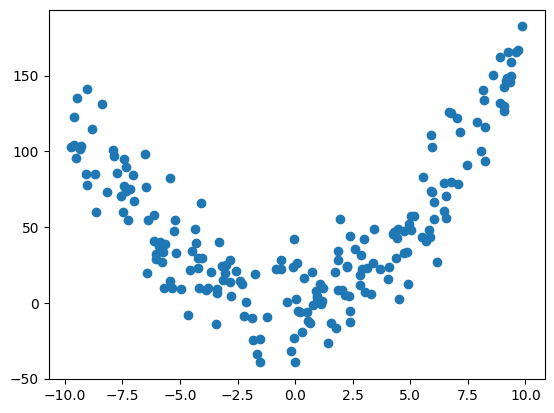

In [133]:
x,y = generateRandomNumber(-10,10,200,20)

plt.scatter(x,y)

In [134]:
reg = LinearRegression()

train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.3)

reg.fit(train_x.reshape(-1,1), train_y.reshape(-1,1))

y_pred = reg.predict(test_x.reshape(-1,1))

# regSummary(test_y, y_pred)

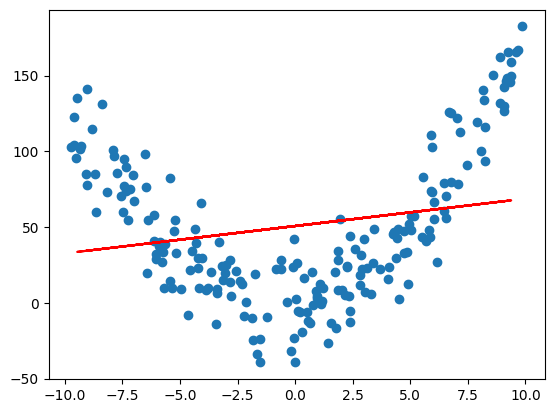

In [135]:
plt.scatter(x,y)
plt.plot(test_x, y_pred, color='red')

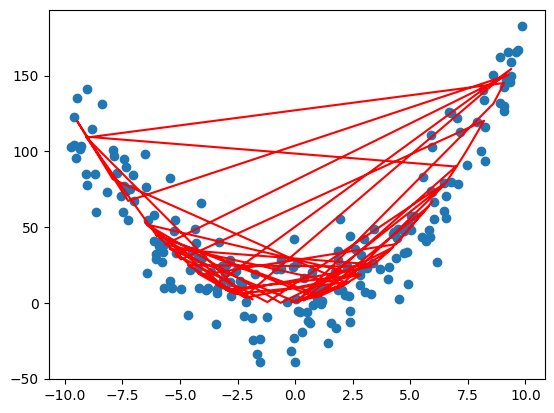

In [144]:
poly = PolynomialFeatures()

train_1 = poly.fit_transform(train_x.reshape(-1,1))
test_1 = poly.transform(test_x.reshape(-1,1))

reg.fit(train_1, train_y)
y_pred = reg.predict(test_1)

plt.scatter(x,y)
plt.plot(test_x, y_pred, color='red')

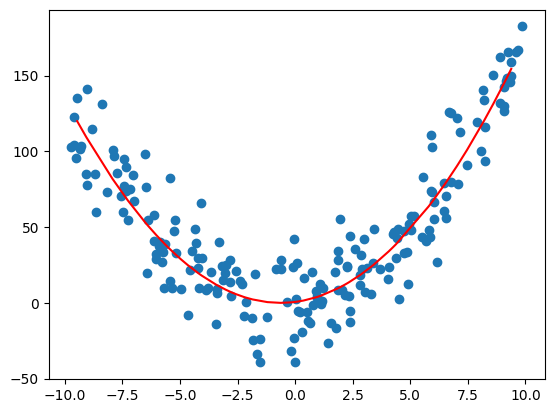

In [137]:
df = pd.DataFrame({"test_x": test_x, "y_pred": y_pred})

df = df.sort_values('test_x')

plt.scatter(x,y)
plt.plot(df["test_x"], df["y_pred"], color='red')

In [138]:
def create_poly(degree):
    poly = PolynomialFeatures(degree=degree)

    train_1 = poly.fit_transform(train_x.reshape(-1,1))
    test_1 = poly.transform(test_x.reshape(-1,1))

    reg.fit(train_1, train_y)
    y_pred = reg.predict(test_1)
    return y_pred

In [139]:
def create_chart(x,y, test_x, y_preds):

    sorted_indices = sorted(range(len(test_x)), key=lambda k: test_x[k])
    sorted_test_x = [test_x[i] for i in sorted_indices]
    
    plt.scatter(x,y)

    for key, __y in y_preds.items():
        sorted_y = [__y[i] for i in sorted_indices]
        plt.plot(sorted_test_x, sorted_y, label=f'{key}:')
    
    plt.legend()
    plt.show()

In [140]:
y_preds = {}
degress = [1,2,10,30,50]

for degree in degress:
    pred= create_poly(degree)
    y_preds[f"d{degree}"] = pred


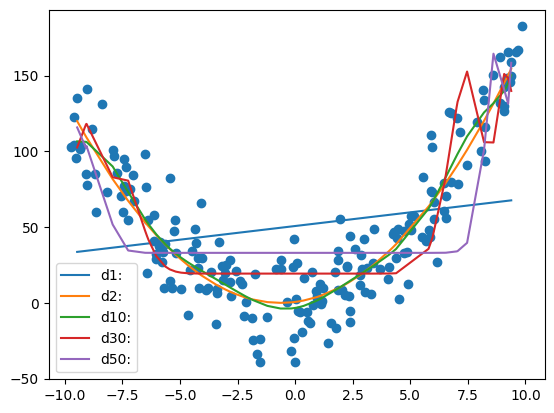

In [141]:
create_chart(x,y,test_x, y_preds)

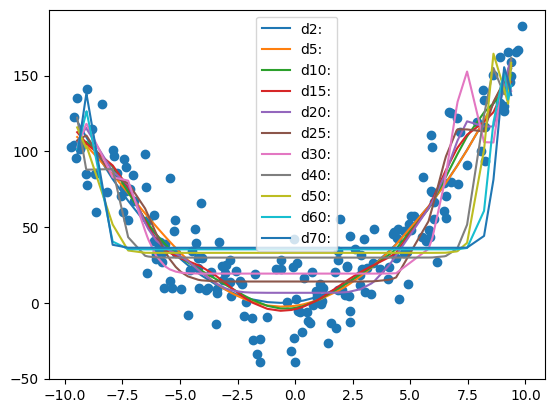

In [142]:
y_preds = {}
degress = [2,5,10,15,20,25,30,40,50,60,70]

for degree in degress:
    pred= create_poly(degree)
    y_preds[f"d{degree}"] = pred

create_chart(x,y,test_x, y_preds)

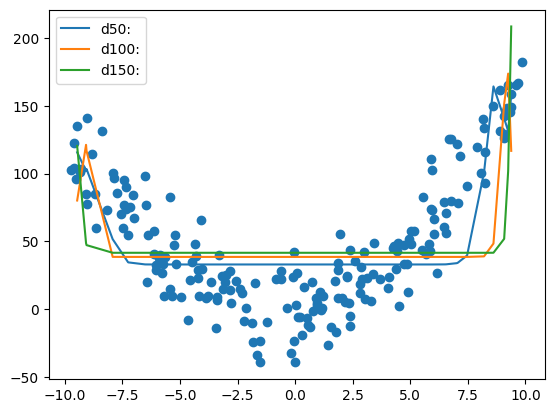

In [143]:
y_preds = {}
degress = [50,100,150]

for degree in degress:
    pred= create_poly(degree)
    y_preds[f"d{degree}"] = pred

create_chart(x,y,test_x, y_preds)